<a href="https://colab.research.google.com/github/tamdoancong/5215-MachineLearning-Doan/blob/master/TamDoanw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starting Instructions
Before starting the home work you need to create a copy of the notebook on your google drive so your changes are saved. To do that you can use the save a copy on drive option on the file menu from top left part of the page. After you did this step the colab should open a new page and change the name of the notebook to "Copy of Machine Learning HW1.ipynb". All of your changes need to be done on this version. For submitting your home work you need to create a shareable link with edit access to your TA/Professor. To get a shareable link you need to click on share button from the right top side and click on the "Change to anyone with the link" button at the bottom of the menu opened. This will create a link but you still need to change the link to editor access level. To do that you can clink on the viever section and change it to editor and copy the link after that. 
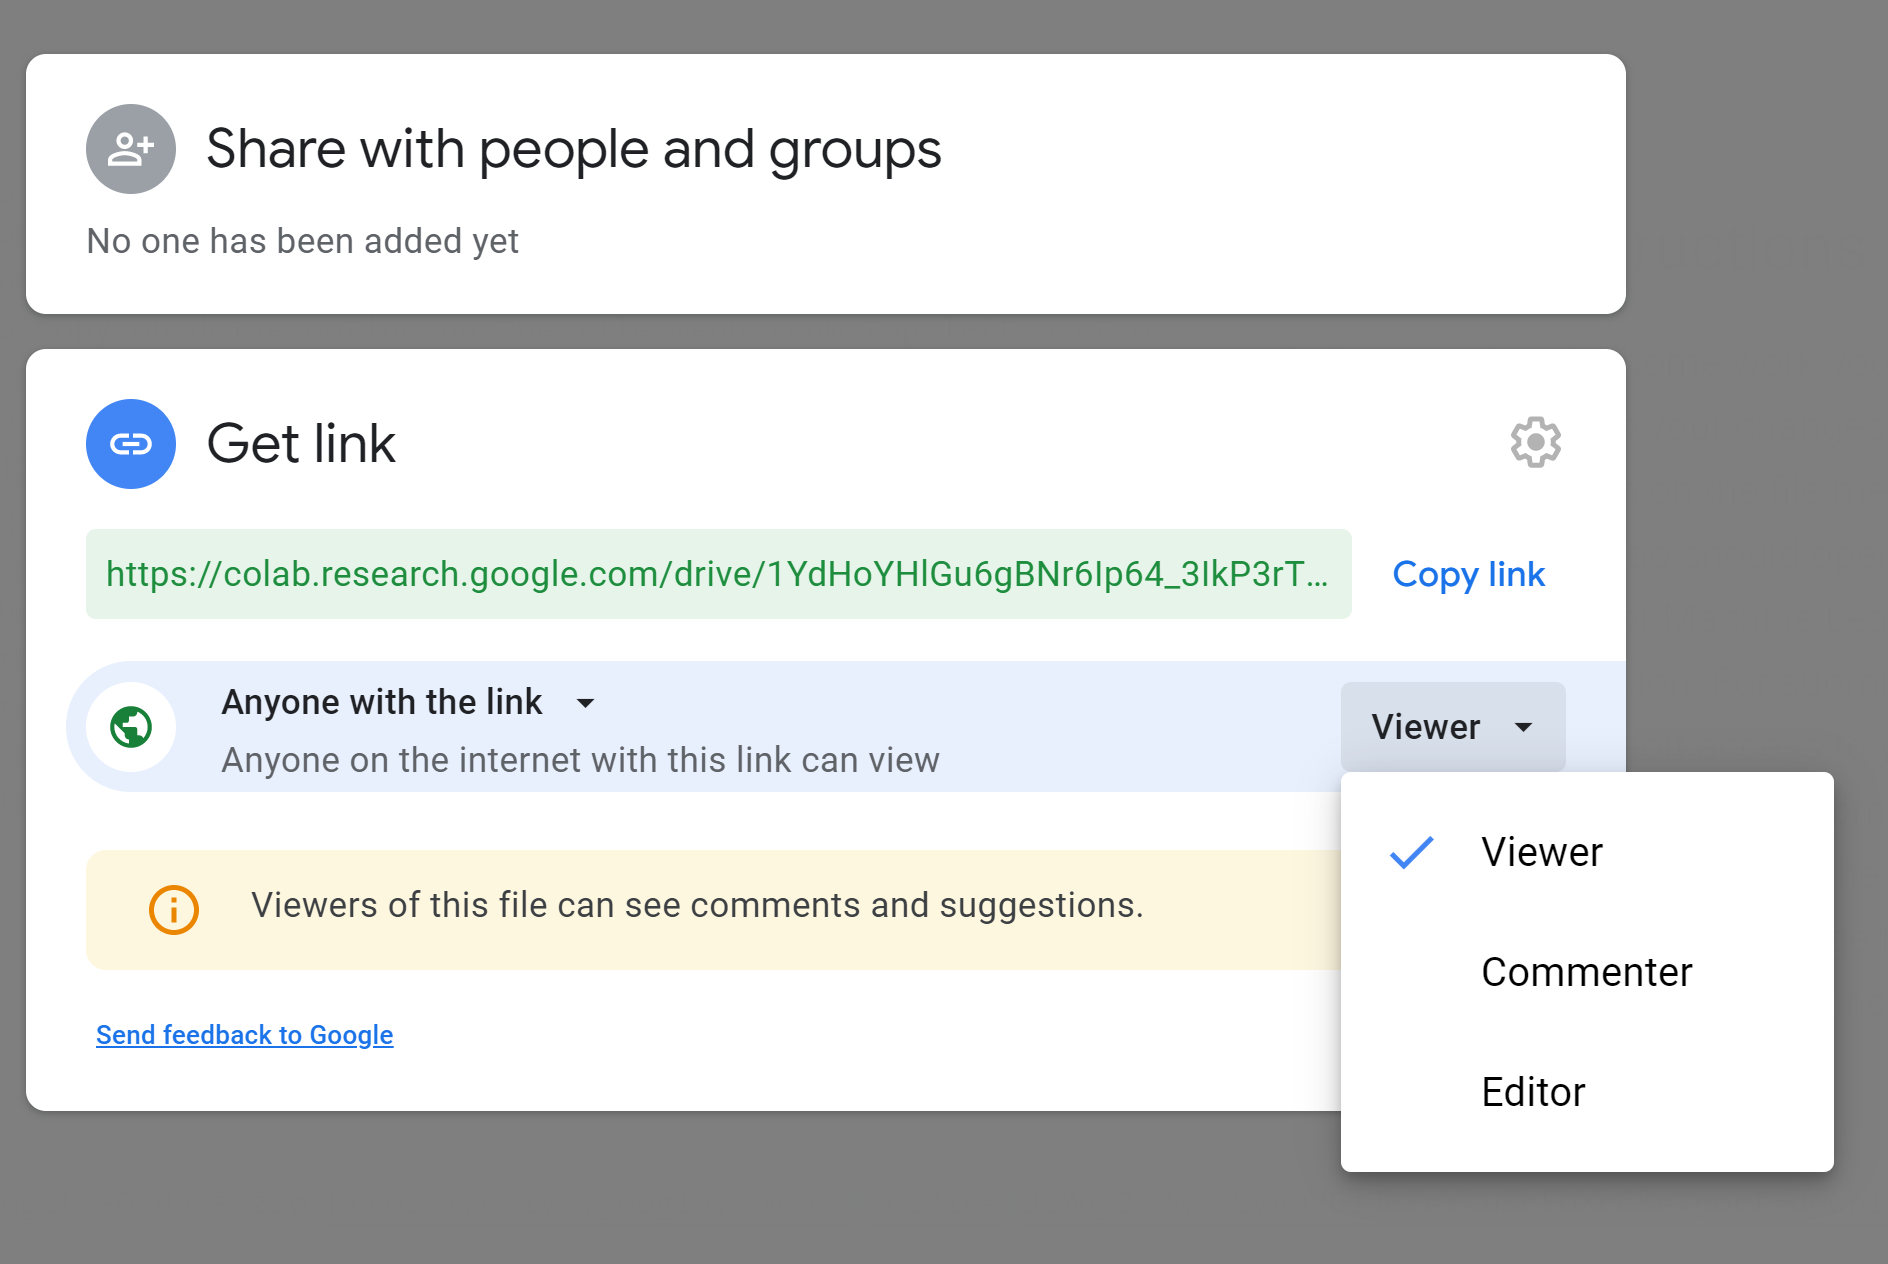

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#this code sets the font size globaly for matplotlib
plt.rcParams.update({'font.size': 18})

# Data Initialization

In [ ]:
linear_example=pd.DataFrame()
linear_example["x1"]=[0.5,0.4,0.4,0.6,0.6,1.5,1.4,1.4,1.6,1.6]
linear_example["x2"]=[0.5,0.4,0.6,0.4,0.6,1.5,1.4,1.6,1.4,1.6]
linear_example["y"]=[1,1,1,1,1,-1,-1,-1,-1,-1]
linear_example

,x1,x2,y
0,0.5,0.5,1
1,0.4,0.4,1
2,0.4,0.6,1
3,0.6,0.4,1
4,0.6,0.6,1
5,1.5,1.5,-1
6,1.4,1.4,-1
7,1.4,1.6,-1
8,1.6,1.4,-1
9,1.6,1.6,-1


# Scatter Plot

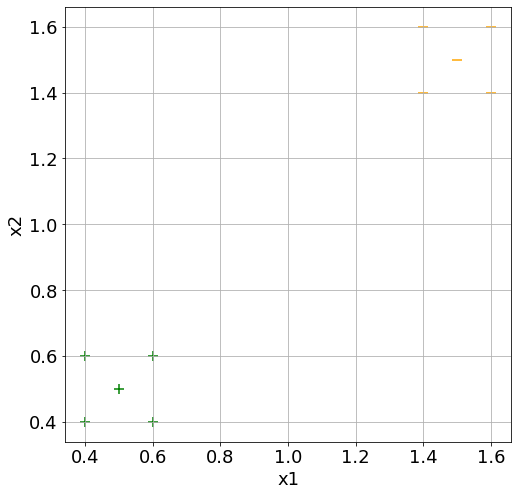

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(8, 8))
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.grid(True)
ax1.scatter(    linear_example[linear_example["y"]==1]["x1"], 
                linear_example[linear_example["y"]==1]["x2"], 
                s=100,
                c = "green", 
                marker = "+")
ax1.scatter(    linear_example[linear_example["y"]==-1]["x1"], 
                linear_example[linear_example["y"]==-1]["x2"], 
                s=100,
                c = "orange", 
                marker = "_")
plt.show()

# Weight initialization 

In [ ]:
# assign the weights w_0 = 0.02, w_1 = -0.01, w_2 = 0.01; this should be a column vector
w_0 = 0.02
w_1 = -0.01
w_2 = 0.01
w = np.array([w_0,w_1,w_2])

In [ ]:
# the shape should be (3, 1); if it isn't, revisit your assignment to w
w.shape

(3,)

In [ ]:
linear_example["x0"]=1

In [ ]:
linear_example

,x1,x2,y,x0
0,0.5,0.5,1,1
1,0.4,0.4,1,1
2,0.4,0.6,1,1
3,0.6,0.4,1,1
4,0.6,0.6,1,1
5,1.5,1.5,-1,1
6,1.4,1.4,-1,1
7,1.4,1.6,-1,1
8,1.6,1.4,-1,1
9,1.6,1.6,-1,1


In [ ]:
linear_example[['x0','x1','x2','y']]

,x0,x1,x2,y
0,1,0.5,0.5,1
1,1,0.4,0.4,1
2,1,0.4,0.6,1
3,1,0.6,0.4,1
4,1,0.6,0.6,1
5,1,1.5,1.5,-1
6,1,1.4,1.4,-1
7,1,1.4,1.6,-1
8,1,1.6,1.4,-1
9,1,1.6,1.6,-1


In [ ]:
B=linear_example['y'].to_numpy()
B

array([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1])

# Draw the decision boundary

In [ ]:
# Fx2 should return the vector of x_2 values for the input vector x_1 
# Make sure this is a vector operation, not scalar
def Fx2(x1):
  w_0 = w[0]
  w_1 = w[1]
  w_2 = w[2]
  a=-w_1/w_2
  b=-w_0/w_2
  #linear  decision boundary ( equation of hyperland)
  #x2=(-w_1/w_2)*x1-(w_0/w_2)
  #x2=(a*x1)+b
  x2=(-w_0-w_1*x1)/w_2

  
  return  x2

# The following example call should return a vector of three values: -2, -1, 0()
Fx2(np.linspace(0, 2, 3))

array([-2., -1.,  0.])

In [ ]:
x1=linear_example['x1']

In [ ]:
Fx2(x1)

0   -1.5
1   -1.6
2   -1.6
3   -1.4
4   -1.4
5   -0.5
6   -0.6
7   -0.6
8   -0.4
9   -0.4
Name: x1, dtype: float64

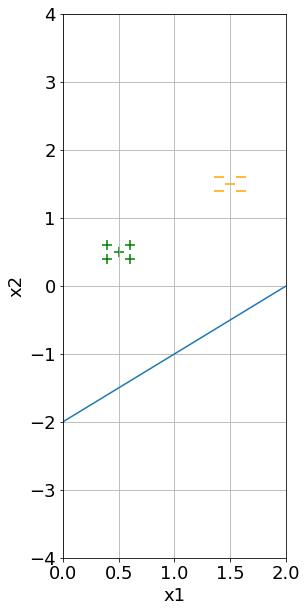

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(4, 10))
ax1.scatter(    linear_example[linear_example["y"]==1]["x1"], 
                linear_example[linear_example["y"]==1]["x2"], 
                s=100,
                c = "green", 
                marker = "+")
ax1.scatter(    linear_example[linear_example["y"]==-1]["x1"], 
                linear_example[linear_example["y"]==-1]["x2"], 
                s=100,
                c = "orange", 
                marker = "_")
ax1.set_xlim(0,2)
ax1.set_ylim(-4,4)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.grid(True)
x1 = np.linspace(0, 2, 1000)
ax1.plot(x1, Fx2(x1));
plt.show()

# Compute the Classifications and Errors

In [ ]:
error_table=pd.DataFrame()
error_table["Xw"]=np.matmul(linear_example[["x0","x1","x2"]].to_numpy(),w)
error_table["sign(Xw)"]=np.sign(error_table["Xw"])
error_table
error_table["(y - sign(Xw))"]=linear_example['y']-error_table['sign(Xw)']
error_table

,Xw,sign(Xw),(y - sign(Xw))
0,0.020,1.0,0.0
1,0.020,1.0,0.0
2,0.022,1.0,0.0
3,0.018,1.0,0.0
4,0.020,1.0,0.0
5,0.020,1.0,-2.0
6,0.020,1.0,-2.0
7,0.022,1.0,-2.0
8,0.018,1.0,-2.0
9,0.020,1.0,-2.0


# Update the Weights

In [ ]:
eta=0.0001 #𝜂 
delta=np.array([.0,.0,.0])
delta[0]= eta * np.matmul(linear_example['x0'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[0])
delta[1]= eta * np.matmul(linear_example['x1'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[1])
delta[2]= eta * np.matmul(linear_example['x2'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[2])
print("delta: ",delta)
# your output should be: delta:  [-0.001  -0.0015 -0.0015]

w[0]=w[0]+delta[0]
w[1]=w[1]+delta[1]
w[2]=w[2]+delta[2]
print("w: ",w)
# your output should be:
# w:  [[ 0.019 ]
# [-0.0115]
# [ 0.0085]]

delta:  [-0.001  -0.0015 -0.0015]
w:  [ 0.019  -0.0115  0.0085]


# Iterate

In [ ]:
# Fx2 should return the vector of x_2 values for the input vector x_1 
# Make sure this is a vector operation, not scalar
def Fx2(x1):
  w_0 = w[0]
  w_1 = w[1]
  w_2 = w[2]
  #a=-w_1/w_2
  #b=-w_0/w_2
  #linear  decision boundary ( equation of hyperland)
  #x2=(-w_1/w_2)*x1-(w_0/w_2)
  #x2=(a*x1)+b
  x2=(-w_0-w_1*x1)/w_2

  
  return  x2

# The following example call should return a vector of three values: -2, -1, 0()
Fx2(np.linspace(0, 2, 3))

array([-2.23529412, -0.88235294,  0.47058824])

In [ ]:
x1=linear_example['x1']

In [ ]:
Fx2(x1)

0   -1.558824
1   -1.694118
2   -1.694118
3   -1.423529
4   -1.423529
5   -0.205882
6   -0.341176
7   -0.341176
8   -0.070588
9   -0.070588
Name: x1, dtype: float64

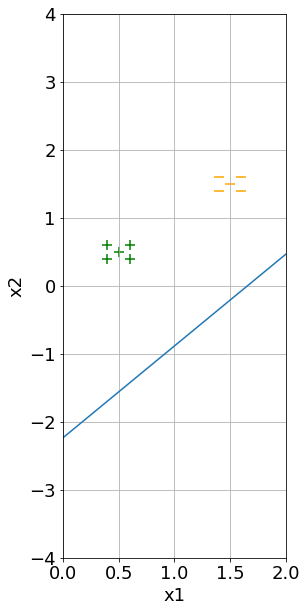

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(4, 10))
ax1.scatter(    linear_example[linear_example["y"]==1]["x1"], 
                linear_example[linear_example["y"]==1]["x2"], 
                s=100,
                c = "green", 
                marker = "+")
ax1.scatter(    linear_example[linear_example["y"]==-1]["x1"], 
                linear_example[linear_example["y"]==-1]["x2"], 
                s=100,
                c = "orange", 
                marker = "_")
ax1.set_xlim(0,2)
ax1.set_ylim(-4,4)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.grid(True)
x1 = np.linspace(0, 2, 1000)
ax1.plot(x1, Fx2(x1));
plt.show()

# Compute the Classifications and Errors

In [ ]:
error_table=pd.DataFrame()
error_table["Xw"]=np.matmul(linear_example[["x0","x1","x2"]].to_numpy(),w)
error_table["sign(Xw)"]=np.sign(error_table["Xw"])
error_table
error_table["(y - sign(Xw))"]=linear_example['y']-error_table['sign(Xw)']
error_table

,Xw,sign(Xw),(y - sign(Xw))
0,0.0175,1.0,0.0
1,0.0178,1.0,0.0
2,0.0195,1.0,0.0
3,0.0155,1.0,0.0
4,0.0172,1.0,0.0
5,0.0145,1.0,-2.0
6,0.0148,1.0,-2.0
7,0.0165,1.0,-2.0
8,0.0125,1.0,-2.0
9,0.0142,1.0,-2.0


# Update the Weights

In [ ]:
eta=0.0001 #𝜂 
delta=np.array([.0,.0,.0])
delta[0]= eta * np.matmul(linear_example['x0'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[0])
delta[1]= eta * np.matmul(linear_example['x1'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[1])
delta[2]= eta * np.matmul(linear_example['x2'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[2])
print("delta: ",delta)
# your output should be: delta:  [-0.001  -0.0015 -0.0015]

w[0]=w[0]+delta[0]
w[1]=w[1]+delta[1]
w[2]=w[2]+delta[2]
print("w: ",w)
# your output should be:
# w:  [[ 0.019 ]
# [-0.0115]
# [ 0.0085]]

delta:  [-0.001  -0.0015 -0.0015]
w:  [ 0.018 -0.013  0.007]


In [ ]:
# Fx2 should return the vector of x_2 values for the input vector x_1 
# Make sure this is a vector operation, not scalar
def Fx2(x1):
  w_0 = w[0]
  w_1 = w[1]
  w_2 = w[2]
  #a=-w_1/w_2
  #b=-w_0/w_2
  #linear  decision boundary ( equation of hyperland)
  #x2=(-w_1/w_2)*x1-(w_0/w_2)
  #x2=(a*x1)+b
  x2=(-w_0-w_1*x1)/w_2
  return  x2

# The following example call should return a vector of three values: -2, -1, 0()
Fx2(np.linspace(0, 2, 3))

array([-2.57142857, -0.71428571,  1.14285714])

In [ ]:
x1=linear_example['x1']

In [ ]:
Fx2(x1)

0   -1.642857
1   -1.828571
2   -1.828571
3   -1.457143
4   -1.457143
5    0.214286
6    0.028571
7    0.028571
8    0.400000
9    0.400000
Name: x1, dtype: float64

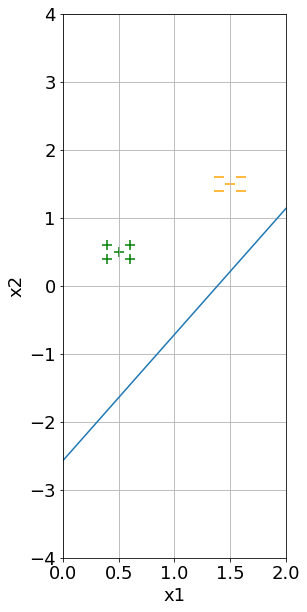

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(4, 10))
ax1.scatter(    linear_example[linear_example["y"]==1]["x1"], 
                linear_example[linear_example["y"]==1]["x2"], 
                s=100,
                c = "green", 
                marker = "+")
ax1.scatter(    linear_example[linear_example["y"]==-1]["x1"], 
                linear_example[linear_example["y"]==-1]["x2"], 
                s=100,
                c = "orange", 
                marker = "_")
ax1.set_xlim(0,2)
ax1.set_ylim(-4,4)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.grid(True)
x1 = np.linspace(0, 2, 1000)
ax1.plot(x1, Fx2(x1));
plt.show()

# Compute the Classifications and Errors

In [ ]:
error_table=pd.DataFrame()
error_table["Xw"]=np.matmul(linear_example[["x0","x1","x2"]].to_numpy(),w)
error_table["sign(Xw)"]=np.sign(error_table["Xw"])
error_table
error_table["(y - sign(Xw))"]=linear_example['y']-error_table['sign(Xw)']
error_table

,Xw,sign(Xw),(y - sign(Xw))
0,0.0150,1.0,0.0
1,0.0156,1.0,0.0
2,0.0170,1.0,0.0
3,0.0130,1.0,0.0
4,0.0144,1.0,0.0
5,0.0090,1.0,-2.0
6,0.0096,1.0,-2.0
7,0.0110,1.0,-2.0
8,0.0070,1.0,-2.0
9,0.0084,1.0,-2.0


# Update the Weights

In [ ]:
eta=0.0001 #𝜂 
delta=np.array([.0,.0,.0])
delta[0]= eta * np.matmul(linear_example['x0'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[0])
delta[1]= eta * np.matmul(linear_example['x1'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[1])
delta[2]= eta * np.matmul(linear_example['x2'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[2])
print("delta: ",delta)
# your output should be: delta:  [-0.001  -0.0015 -0.0015]

w[0]=w[0]+delta[0]
w[1]=w[1]+delta[1]
w[2]=w[2]+delta[2]
print("w: ",w)
# your output should be:
# w:  [[ 0.019 ]
# [-0.0115]
# [ 0.0085]]

delta:  [-0.001  -0.0015 -0.0015]
w:  [ 0.017  -0.0145  0.0055]


In [ ]:
# Fx2 should return the vector of x_2 values for the input vector x_1 
# Make sure this is a vector operation, not scalar
def Fx2(x1):
  w_0 = w[0]
  w_1 = w[1]
  w_2 = w[2]
  
  #linear  decision boundary ( equation of hyperland)
  
  x2=(-w_0-w_1*x1)/w_2

  
  return  x2

# The following example call should return a vector of three values: -2, -1, 0()
Fx2(np.linspace(0, 2, 3))

array([-3.09090909, -0.45454545,  2.18181818])

In [ ]:
x1=linear_example['x1']

In [ ]:
Fx2(x1)

0   -1.772727
1   -2.036364
2   -2.036364
3   -1.509091
4   -1.509091
5    0.863636
6    0.600000
7    0.600000
8    1.127273
9    1.127273
Name: x1, dtype: float64

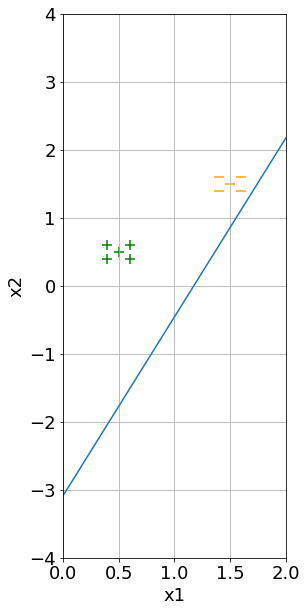

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(4, 10))
ax1.scatter(    linear_example[linear_example["y"]==1]["x1"], 
                linear_example[linear_example["y"]==1]["x2"], 
                s=100,
                c = "green", 
                marker = "+")
ax1.scatter(    linear_example[linear_example["y"]==-1]["x1"], 
                linear_example[linear_example["y"]==-1]["x2"], 
                s=100,
                c = "orange", 
                marker = "_")
ax1.set_xlim(0,2)
ax1.set_ylim(-4,4)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.grid(True)
x1 = np.linspace(0, 2, 1000)
ax1.plot(x1, Fx2(x1));
plt.show()

# Compute the Classifications and Errors

In [ ]:
error_table=pd.DataFrame()
error_table["Xw"]=np.matmul(linear_example[["x0","x1","x2"]].to_numpy(),w)
error_table["sign(Xw)"]=np.sign(error_table["Xw"])
error_table
error_table["(y - sign(Xw))"]=linear_example['y']-error_table['sign(Xw)']
error_table

,Xw,sign(Xw),(y - sign(Xw))
0,0.0125,1.0,0.0
1,0.0134,1.0,0.0
2,0.0145,1.0,0.0
3,0.0105,1.0,0.0
4,0.0116,1.0,0.0
5,0.0035,1.0,-2.0
6,0.0044,1.0,-2.0
7,0.0055,1.0,-2.0
8,0.0015,1.0,-2.0
9,0.0026,1.0,-2.0


# Update the Weights

In [ ]:
eta=0.0001 #𝜂 
delta=np.array([.0,.0,.0])
delta[0]= eta * np.matmul(linear_example['x0'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[0])
delta[1]= eta * np.matmul(linear_example['x1'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[1])
delta[2]= eta * np.matmul(linear_example['x2'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[2])
print("delta: ",delta)
# your output should be: delta:  [-0.001  -0.0015 -0.0015]

w[0]=w[0]+delta[0]
w[1]=w[1]+delta[1]
w[2]=w[2]+delta[2]
print("w: ",w)
# your output should be:
# w:  [[ 0.019 ]
# [-0.0115]
# [ 0.0085]]

delta:  [-0.001  -0.0015 -0.0015]
w:  [ 0.016 -0.016  0.004]


In [ ]:
# Fx2 should return the vector of x_2 values for the input vector x_1 
# Make sure this is a vector operation, not scalar
def Fx2(x1):
  w_0 = w[0]
  w_1 = w[1]
  w_2 = w[2]
  a=-w_1/w_2
  b=-w_0/w_2
  #linear  decision boundary ( equation of hyperland)
  #x2=(-w_1/w_2)*x1-(w_0/w_2)
  #x2=(a*x1)+b
  x2=(-w_0-w_1*x1)/w_2

  
  return  x2

# The following example call should return a vector of three values: -2, -1, 0()
Fx2(np.linspace(0, 2, 3))

array([-4.00000000e+00,  8.67361738e-16,  4.00000000e+00])

In [ ]:
x1=linear_example['x1']

In [ ]:
Fx2(x1)

0   -2.0
1   -2.4
2   -2.4
3   -1.6
4   -1.6
5    2.0
6    1.6
7    1.6
8    2.4
9    2.4
Name: x1, dtype: float64

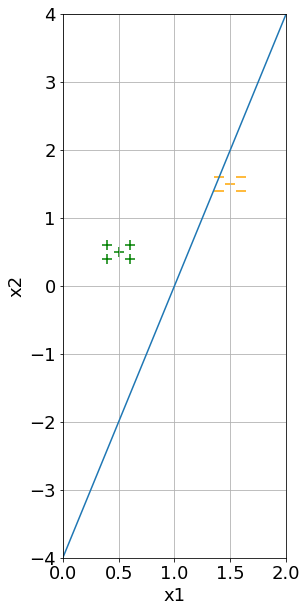

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(4, 10))
ax1.scatter(    linear_example[linear_example["y"]==1]["x1"], 
                linear_example[linear_example["y"]==1]["x2"], 
                s=100,
                c = "green", 
                marker = "+")
ax1.scatter(    linear_example[linear_example["y"]==-1]["x1"], 
                linear_example[linear_example["y"]==-1]["x2"], 
                s=100,
                c = "orange", 
                marker = "_")
ax1.set_xlim(0,2)
ax1.set_ylim(-4,4)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.grid(True)
x1 = np.linspace(0, 2, 1000)
ax1.plot(x1, Fx2(x1));
plt.show()

# Compute the Classifications and Errors

In [ ]:
error_table=pd.DataFrame()
error_table["Xw"]=np.matmul(linear_example[["x0","x1","x2"]].to_numpy(),w)
error_table["sign(Xw)"]=np.sign(error_table["Xw"])
error_table
error_table["(y - sign(Xw))"]=linear_example['y']-error_table['sign(Xw)']
error_table

,Xw,sign(Xw),(y - sign(Xw))
0,0.0100,1.0,0.0
1,0.0112,1.0,0.0
2,0.0120,1.0,0.0
3,0.0080,1.0,0.0
4,0.0088,1.0,0.0
5,-0.0020,-1.0,0.0
6,-0.0008,-1.0,0.0
7,0.0000,0.0,-1.0
8,-0.0040,-1.0,0.0
9,-0.0032,-1.0,0.0


# Update the Weights

In [ ]:
eta=0.0001 #𝜂 
delta=np.array([.0,.0,.0])
delta[0]= eta * np.matmul(linear_example['x0'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[0])
delta[1]= eta * np.matmul(linear_example['x1'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[1])
delta[2]= eta * np.matmul(linear_example['x2'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[2])
print("delta: ",delta)
# your output should be: delta:  [-0.001  -0.0015 -0.0015]

w[0]=w[0]+delta[0]
w[1]=w[1]+delta[1]
w[2]=w[2]+delta[2]
print("w: ",w)
# your output should be:
# w:  [[ 0.019 ]
# [-0.0115]
# [ 0.0085]]

delta:  [-0.0001  -0.00014 -0.00016]
w:  [ 0.0159  -0.01614  0.00384]


In [ ]:
# Fx2 should return the vector of x_2 values for the input vector x_1 
# Make sure this is a vector operation, not scalar
def Fx2(x1):
  w_0 = w[0]
  w_1 = w[1]
  w_2 = w[2]
  a=-w_1/w_2
  b=-w_0/w_2
  #linear  decision boundary ( equation of hyperland)
  #x2=(-w_1/w_2)*x1-(w_0/w_2)
  #x2=(a*x1)+b
  x2=(-w_0-w_1*x1)/w_2

  
  return  x2

# The following example call should return a vector of three values: -2, -1, 0()
Fx2(np.linspace(0, 2, 3))

array([-4.140625,  0.0625  ,  4.265625])

In [ ]:
x1=linear_example['x1']

In [ ]:
Fx2(x1)

0   -2.039062
1   -2.459375
2   -2.459375
3   -1.618750
4   -1.618750
5    2.164063
6    1.743750
7    1.743750
8    2.584375
9    2.584375
Name: x1, dtype: float64

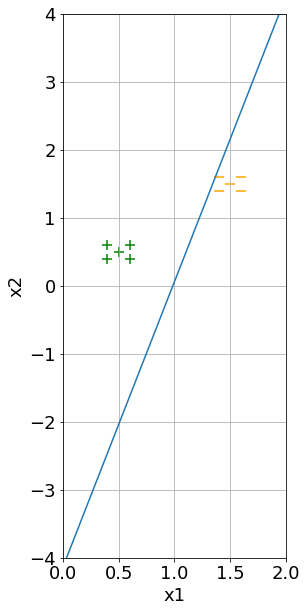

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(4, 10))
ax1.scatter(    linear_example[linear_example["y"]==1]["x1"], 
                linear_example[linear_example["y"]==1]["x2"], 
                s=100,
                c = "green", 
                marker = "+")
ax1.scatter(    linear_example[linear_example["y"]==-1]["x1"], 
                linear_example[linear_example["y"]==-1]["x2"], 
                s=100,
                c = "orange", 
                marker = "_")
ax1.set_xlim(0,2)
ax1.set_ylim(-4,4)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.grid(True)
x1 = np.linspace(0, 2, 1000)
ax1.plot(x1, Fx2(x1));
plt.show()

# Compute the Classifications and Errors

In [ ]:
error_table=pd.DataFrame()
error_table["Xw"]=np.matmul(linear_example[["x0","x1","x2"]].to_numpy(),w)
error_table["sign(Xw)"]=np.sign(error_table["Xw"])
error_table
error_table["(y - sign(Xw))"]=linear_example['y']-error_table['sign(Xw)']
error_table

,Xw,sign(Xw),(y - sign(Xw))
0,0.009750,1.0,0.0
1,0.010980,1.0,0.0
2,0.011748,1.0,0.0
3,0.007752,1.0,0.0
4,0.008520,1.0,0.0
5,-0.002550,-1.0,0.0
6,-0.001320,-1.0,0.0
7,-0.000552,-1.0,0.0
8,-0.004548,-1.0,0.0
9,-0.003780,-1.0,0.0


In [ ]:
error_table['(y - sign(Xw))'].sum()

0.0

# Update the Weights

In [ ]:
eta=0.0001 #𝜂 
delta=np.array([.0,.0,.0])
delta[0]= eta * np.matmul(linear_example['x0'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[0])
delta[1]= eta * np.matmul(linear_example['x1'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[1])
delta[2]= eta * np.matmul(linear_example['x2'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[2])
print("delta: ",delta)
# your output should be: delta:  [-0.001  -0.0015 -0.0015]

w[0]=w[0]+delta[0]
w[1]=w[1]+delta[1]
w[2]=w[2]+delta[2]
print("w: ",w)
# your output should be:
# w:  [[ 0.019 ]
# [-0.0115]
# [ 0.0085]]

delta:  [0. 0. 0.]
w:  [ 0.0159  -0.01614  0.00384]


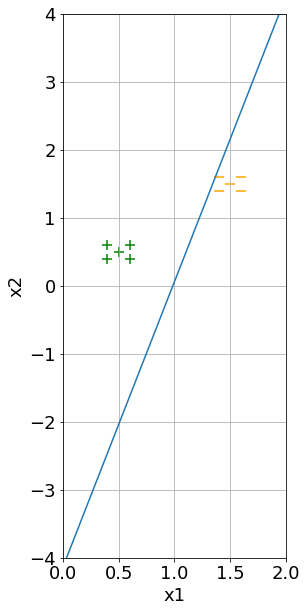

In [ ]:
fig, (ax1) = plt.subplots(1, figsize=(4, 10))
ax1.scatter(    linear_example[linear_example["y"]==1]["x1"], 
                linear_example[linear_example["y"]==1]["x2"], 
                s=100,
                c = "green", 
                marker = "+")
ax1.scatter(    linear_example[linear_example["y"]==-1]["x1"], 
                linear_example[linear_example["y"]==-1]["x2"], 
                s=100,
                c = "orange", 
                marker = "_")
ax1.set_xlim(0,2)
ax1.set_ylim(-4,4)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.grid(True)
x1 = np.linspace(0, 2, 1000)
ax1.plot(x1, Fx2(x1));
plt.show()




In [ ]:
error_table=pd.DataFrame()
error_table["Xw"]=np.matmul(linear_example[["x0","x1","x2"]].to_numpy(),w)
error_table["sign(Xw)"]=np.sign(error_table["Xw"])
error_table
error_table["(y - sign(Xw))"]=linear_example['y']-error_table['sign(Xw)']
error_table

,Xw,sign(Xw),(y - sign(Xw))
0,0.009750,1.0,0.0
1,0.010980,1.0,0.0
2,0.011748,1.0,0.0
3,0.007752,1.0,0.0
4,0.008520,1.0,0.0
5,-0.002550,-1.0,0.0
6,-0.001320,-1.0,0.0
7,-0.000552,-1.0,0.0
8,-0.004548,-1.0,0.0
9,-0.003780,-1.0,0.0


In [ ]:
error_table['(y - sign(Xw))'].sum()

0.0

# Update the Weights

In [ ]:
eta=0.0001 #𝜂 
delta=np.array([.0,.0,.0])
delta[0]= eta * np.matmul(linear_example['x0'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[0])
delta[1]= eta * np.matmul(linear_example['x1'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[1])
delta[2]= eta * np.matmul(linear_example['x2'].to_numpy(),error_table['(y - sign(Xw))'].to_numpy())
#print(delta[2])
print("delta: ",delta)
# your output should be: delta:  [-0.001  -0.0015 -0.0015]

w[0]=w[0]+delta[0]
w[1]=w[1]+delta[1]
w[2]=w[2]+delta[2]
print("w: ",w)
# your output should be:
# w:  [[ 0.019 ]
# [-0.0115]
# [ 0.0085]]

delta:  [0. 0. 0.]
w:  [ 0.0159  -0.01614  0.00384]
